In [34]:
%load_ext nb_black

import pandas_datareader as pdr

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [35]:
stock_data = pdr.get_data_tiingo(
    "AAPL", api_key="f9e621c4e809f1d36aeeb0cf4930bf42b4168281"
)

<IPython.core.display.Javascript object>

In [36]:
stock_data.to_csv("AAPL.csv")

<IPython.core.display.Javascript object>

In [37]:
stock_data_close = stock_data.reset_index()["close"]

<IPython.core.display.Javascript object>

In [38]:
stock_data_close.head()

0    94.69
1    96.10
2    96.76
3    96.91
4    96.69
Name: close, dtype: float64

<IPython.core.display.Javascript object>

In [39]:
stock_data_close.shape

(1258,)

<IPython.core.display.Javascript object>

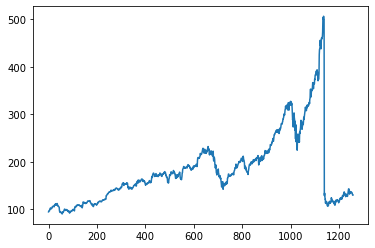

<IPython.core.display.Javascript object>

In [40]:
import matplotlib.pyplot as plt

plt.plot(stock_data_close)

- __LSTM are sensitive to the scale of the data, so we apply MinMax Scaler__

In [42]:
import numpy as np

<IPython.core.display.Javascript object>

In [43]:
from sklearn.preprocessing import MinMaxScaler

<IPython.core.display.Javascript object>

In [44]:
scaler = MinMaxScaler(feature_range=(0, 1))
stock_data_close_transformed = scaler.fit_transform(
    np.array(stock_data_close).reshape(-1, 1)
)

<IPython.core.display.Javascript object>

In [45]:
stock_data_close_transformed.shape

(1258, 1)

<IPython.core.display.Javascript object>

In [46]:
stock_data_close_transformed

array([[0.01046302],
       [0.01385448],
       [0.01544197],
       ...,
       [0.09741431],
       [0.09469633],
       [0.09508118]])

<IPython.core.display.Javascript object>

In [47]:
# splitting the data into train and test
training_size = int(len(stock_data_close_transformed) * 0.65)
test_size = len(stock_data_close_transformed) - training_size
train_data, test_data = (
    stock_data_close_transformed[0:training_size, :],
    stock_data_close_transformed[training_size : len(stock_data_close_transformed), :1],
)

<IPython.core.display.Javascript object>

In [48]:
len(train_data)

817

<IPython.core.display.Javascript object>

In [51]:
import numpy


def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i : (i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

<IPython.core.display.Javascript object>

In [52]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

<IPython.core.display.Javascript object>

In [54]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

<IPython.core.display.Javascript object>

In [55]:
X_train.shape

(716, 100, 1)

<IPython.core.display.Javascript object>

In [56]:
X_test.shape

(340, 100, 1)

<IPython.core.display.Javascript object>

In [57]:
# create LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

<IPython.core.display.Javascript object>

In [60]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


<IPython.core.display.Javascript object>

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [63]:
model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    verbose=1,
)

Epoch 1/100
12/12 [==============================] - 4s 342ms/step - loss: 0.0092 - val_loss: 0.0482
Epoch 2/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0019 - val_loss: 0.0231
Epoch 3/100
12/12 [==============================] - 2s 199ms/step - loss: 8.3599e-04 - val_loss: 0.0209
Epoch 4/100
12/12 [==============================] - 2s 185ms/step - loss: 4.3048e-04 - val_loss: 0.0211
Epoch 5/100
12/12 [==============================] - 2s 187ms/step - loss: 3.9304e-04 - val_loss: 0.0197
Epoch 6/100
12/12 [==============================] - 2s 185ms/step - loss: 3.5948e-04 - val_loss: 0.0193
Epoch 7/100
12/12 [==============================] - 3s 209ms/step - loss: 3.5484e-04 - val_loss: 0.0188
Epoch 8/100
12/12 [==============================] - 2s 208ms/step - loss: 3.7119e-04 - val_loss: 0.0184
Epoch 9/100
12/12 [==============================] - 3s 216ms/step - loss: 3.2793e-04 - val_loss: 0.0178
Epoch 10/100
12/12 [==============================] - 2s 207ms/

12/12 [==============================] - 2s 179ms/step - loss: 1.0694e-04 - val_loss: 0.0073
Epoch 79/100
12/12 [==============================] - 2s 186ms/step - loss: 1.1086e-04 - val_loss: 0.0091
Epoch 80/100
12/12 [==============================] - 2s 166ms/step - loss: 1.0478e-04 - val_loss: 0.0076
Epoch 81/100
12/12 [==============================] - 2s 164ms/step - loss: 1.0015e-04 - val_loss: 0.0070
Epoch 82/100
12/12 [==============================] - 2s 165ms/step - loss: 9.8096e-05 - val_loss: 0.0069
Epoch 83/100
12/12 [==============================] - 2s 165ms/step - loss: 1.0355e-04 - val_loss: 0.0066
Epoch 84/100
12/12 [==============================] - 2s 169ms/step - loss: 1.1236e-04 - val_loss: 0.0072
Epoch 85/100
12/12 [==============================] - 2s 170ms/step - loss: 1.0078e-04 - val_loss: 0.0072
Epoch 86/100
12/12 [==============================] - 2s 167ms/step - loss: 9.5039e-05 - val_loss: 0.0071
Epoch 87/100
12/12 [==============================] - 2s 16

<IPython.core.display.Javascript object>

In [64]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

<IPython.core.display.Javascript object>

In [65]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

<IPython.core.display.Javascript object>

In [66]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, train_predict))

164.41203785602931

<IPython.core.display.Javascript object>

In [67]:
math.sqrt(mean_squared_error(y_test, test_predict))

263.13424809280264

<IPython.core.display.Javascript object>